In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("data/ebw_data.txt", sep="\t")

df

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48
...,...,...,...,...,...,...
67,44,146,9.0,60,1.20,1.72
68,45,146,9.0,60,1.36,1.76
69,45,146,9.0,60,1.28,1.76
70,45,146,9.0,60,1.28,1.76


In [3]:
df.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


array([[<AxesSubplot:title={'center':'IW'}>,
        <AxesSubplot:title={'center':'IF'}>],
       [<AxesSubplot:title={'center':'VW'}>,
        <AxesSubplot:title={'center':'FP'}>],
       [<AxesSubplot:title={'center':'Depth'}>,
        <AxesSubplot:title={'center':'Width'}>]], dtype=object)

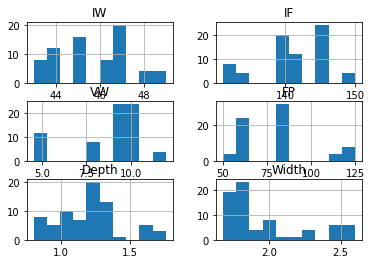

In [4]:
df.hist()

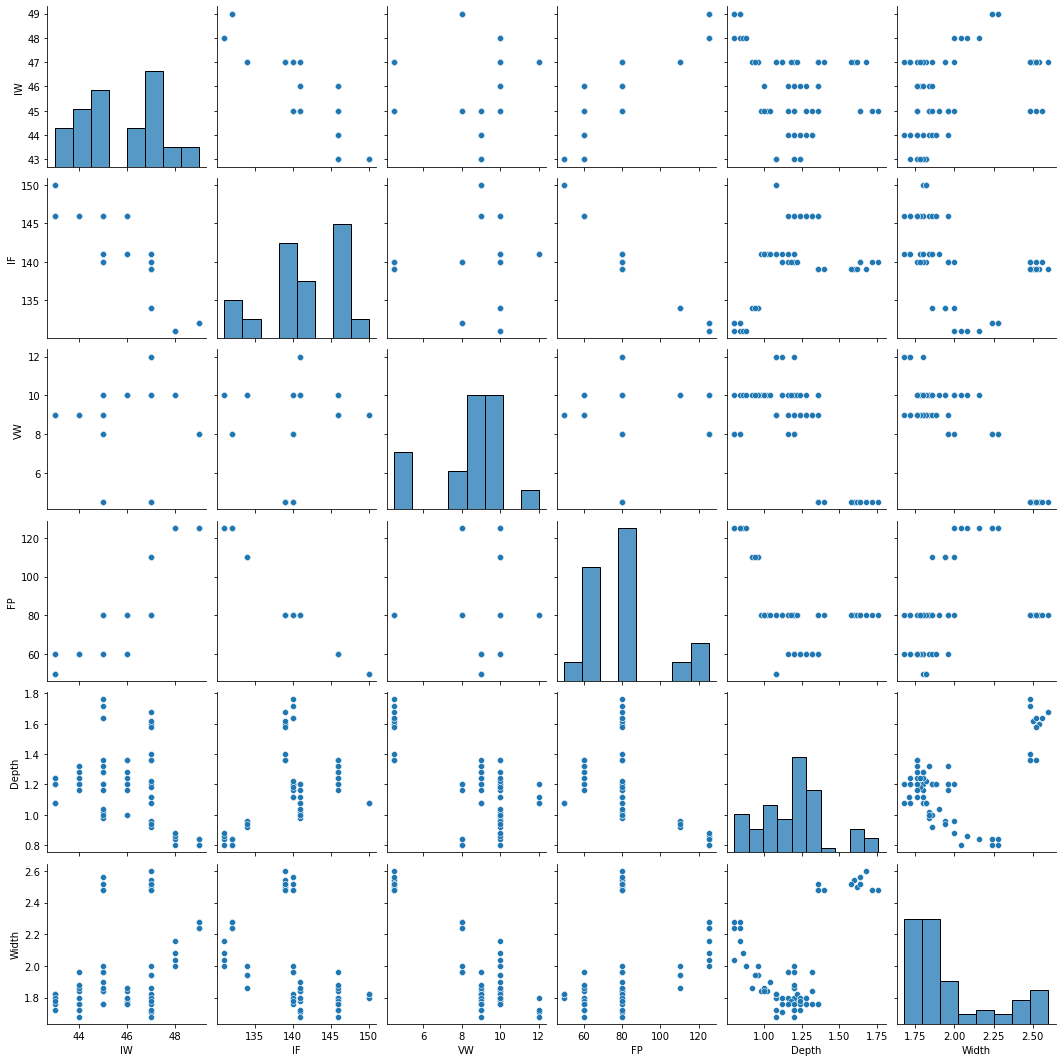

In [5]:
sns.pairplot(df);

In [6]:
df.corr()

,IW,IF,VW,FP,Depth,Width
IW,1.000000,-0.861073,-0.043430,0.835530,-0.289568,0.434869
IF,-0.861073,1.000000,0.115093,-0.980562,0.376084,-0.510167
VW,-0.043430,0.115093,1.000000,-0.001060,-0.671437,-0.874257
FP,0.835530,-0.980562,-0.001060,1.000000,-0.510748,0.412962
Depth,-0.289568,0.376084,-0.671437,-0.510748,1.000000,0.425391
Width,0.434869,-0.510167,-0.874257,0.412962,0.425391,1.000000


In [7]:
X = df[['IW','IF','VW','FP']]
YD = df['Depth']
YW = df['Width']

In [8]:
from sklearn.model_selection import train_test_split
RND = 1
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(X, YD, test_size=0.2, random_state=RND)
x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(X, YW, test_size=0.2, random_state=RND)

# Модели
* Регрессии sklearn
* Нейросеть
* Catboost регрессию

## Линейная регрессия

In [34]:
from sklearn.linear_model import LinearRegression
regressor_d = LinearRegression()
regressor_d.fit(x_train_d, y_train_d)

regressor_w = LinearRegression()
regressor_w.fit(x_train_w, y_train_w)

y_pred_d = regressor_d.predict(x_test_d)
y_pred_w = regressor_w.predict(x_test_w)

print("Error Depth:",mean_absolute_error(y_test_d, y_pred_d))
print("Error Width:",mean_absolute_error(y_test_w, y_pred_w))

Error Depth: 0.08511510490178463
Error Width: 0.06588233121655893


## Регрессия дерева решений

In [35]:
from sklearn.tree import DecisionTreeRegressor

regressor_d = DecisionTreeRegressor(random_state=RND)
regressor_d.fit(x_train_d, y_train_d)

regressor_w = DecisionTreeRegressor(random_state=RND)
regressor_w.fit(x_train_w, y_train_w)

y_pred_d = regressor_d.predict(x_test_d)
y_pred_w = regressor_w.predict(x_test_w)

print("Error Depth:",mean_absolute_error(y_test_d, y_pred_d))
print("Error Width:",mean_absolute_error(y_test_w, y_pred_w))

Error Depth: 0.04977777777777773
Error Width: 0.03377777777777779


## Регрессия случайных деревьев

In [36]:
from sklearn.ensemble import RandomForestRegressor

regressor_d = RandomForestRegressor(n_estimators = 10,random_state=RND)
regressor_d.fit(x_train_d, y_train_d)

regressor_w = RandomForestRegressor(n_estimators = 10,random_state=RND)
regressor_w.fit(x_train_w, y_train_w)

y_pred_d = regressor_d.predict(x_test_d)
y_pred_w = regressor_w.predict(x_test_w)

print("Error Depth:",mean_absolute_error(y_test_d, y_pred_d))
print("Error Width:",mean_absolute_error(y_test_w, y_pred_w))

Error Depth: 0.062346349206349176
Error Width: 0.038213809523809435


## Полиномиальная регрессия

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg_d = PolynomialFeatures(degree = 4)
X_poly_d = poly_reg_d.fit_transform(x_train_d)
regressor_d = LinearRegression()
regressor_d.fit(X_poly_d, y_train_d)

poly_reg_w = PolynomialFeatures(degree = 4)
X_poly_w = poly_reg_w.fit_transform(x_train_w)
regressor_w = LinearRegression()
regressor_w.fit(X_poly_w, y_train_w)

y_pred_d = regressor_d.predict(poly_reg_d.transform(x_test_d))
y_pred_w = regressor_w.predict(poly_reg_w.transform(x_test_w))

print("Error Depth:",mean_absolute_error(y_test_d, y_pred_d))
print("Error Width:",mean_absolute_error(y_test_w, y_pred_w))

Error Depth: 0.052235351562500004
Error Width: 0.034106625874837246


## Нейросеть

In [254]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [17]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X))

In [255]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 0.2])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)
    
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.01),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.01),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.01),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.002))
    return model

dnn_model = build_and_compile_model(normalizer)

1/1 [==============================] - 0s 60ms/step
Error Depth: 0.052613595962524386


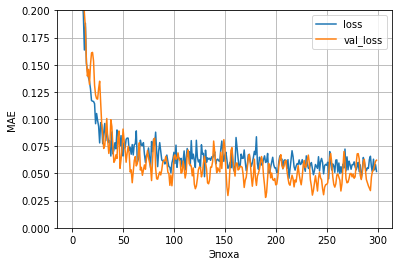

In [256]:
history = dnn_model.fit(
    x_train_d,
    y_train_d,
    epochs=300,
    verbose=0,
    validation_split = 0.1)

plot_loss(history)

y_pred_d = dnn_model.predict(x_test_d)
print("Error Depth:",mean_absolute_error(y_test_d, y_pred_d))

1/1 [==============================] - 0s 16ms/step
Error Width: 0.034106625874837246


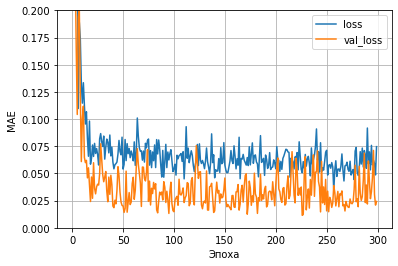

In [257]:
history = dnn_model.fit(
    x_train_w,
    y_train_w,
    epochs=300,
    verbose=0,
    validation_split = 0.1)

plot_loss(history)

y_pred_d = dnn_model.predict(x_test_w)
print("Error Width:",mean_absolute_error(y_test_w, y_pred_w))

## Catboost

In [282]:
from catboost import CatBoostRegressor
ctb_model = CatBoostRegressor(iterations=50000,
                                eval_metric='MAE',
                                random_state=RND,
                                logging_level='Silent')
ctb_model.fit(x_train_d[:], y_train_d[:],
#eval_set=[(x_train_d[20:], y_train_d[20:])],
 plot=True)
y_pred_d = ctb_model.predict(x_test_d)
print("Error Depth:",mean_absolute_error(y_test_d, y_pred_d))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Error Depth: 0.049778030562237924


## Выбор модели
Как итог, нейросеть не смогла дать результат лучше чем DecisionTreeRegressor, поэтому берем ее
обучим на всей выборке и сохраним для каждого значения

In [284]:
from sklearn.tree import DecisionTreeRegressor

model_d = DecisionTreeRegressor(random_state=RND)
model_d.fit(X, YD)

model_w= DecisionTreeRegressor(random_state=RND)
model_w.fit(X, YW)

DecisionTreeRegressor(random_state=1)

In [285]:
import pickle

In [289]:
with open('model_d.pkl','wb') as d:
    pickle.dump(model_d,d)
    
with open('model_w.pkl','wb') as w:
    pickle.dump(model_w,w)    